In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
Data = pd.read_csv('googleplaystore.csv',  na_values = ['?', '??', '???','N/A', 'NA', 'nan', 'NaN', '-nan', '-NaN', 'null'])
Data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
Data = Data.drop(["App", "Current Ver", "Android Ver"], axis = 1)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10841 non-null  object 
 1   Rating          9367 non-null   float64
 2   Reviews         10841 non-null  object 
 3   Size            10841 non-null  object 
 4   Installs        10841 non-null  object 
 5   Type            10840 non-null  object 
 6   Price           10841 non-null  object 
 7   Content Rating  10840 non-null  object 
 8   Genres          10841 non-null  object 
 9   Last Updated    10841 non-null  object 
dtypes: float64(1), object(9)
memory usage: 847.1+ KB


## Data Transformation

In [5]:
cgr_col = ['Category', 'Type', 'Content Rating', 'Genres']
num_col = ['Rating', 'Reviews', 'Size', 'Price']
date_col = ["Last Updated"]
y = ['Installs']

### Cgr

In [6]:
data = Data.copy()
for cgr in cgr_col:
  print("cgr", data[cgr].unique() )

cgr ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
cgr ['Free' 'Paid' nan '0']
cgr ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'
 nan]
cgr ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Enter

In [7]:
# 1 Category
Data = Data.drop([10472])

In [8]:
Data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [9]:
# 2 Type #결측치 처리 필요 
Data.Type.value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [10]:
#3 Content Rating #One hot 필요 
Data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [11]:
#4 Genres
Data.Genres.value_counts() #카테고리 줄이기 필요


Tools                                  842
Entertainment                          623
Education                              549
Medical                                463
Business                               460
                                      ... 
Puzzle;Education                         1
Travel & Local;Action & Adventure        1
Parenting;Brain Games                    1
Health & Fitness;Action & Adventure      1
Card;Brain Games                         1
Name: Genres, Length: 119, dtype: int64

In [12]:
Data.Genres.value_counts().describe()

count    119.000000
mean      91.092437
std      155.181359
min        1.000000
25%        2.000000
50%       13.000000
75%       93.000000
max      842.000000
Name: Genres, dtype: float64

In [13]:
Data.Genres.value_counts().index

Index(['Tools', 'Entertainment', 'Education', 'Medical', 'Business',
       'Productivity', 'Sports', 'Personalization', 'Communication',
       'Lifestyle',
       ...
       'Comics;Creativity', 'Lifestyle;Pretend Play',
       'Entertainment;Education', 'Adventure;Brain Games',
       'Lifestyle;Education', 'Puzzle;Education',
       'Travel & Local;Action & Adventure', 'Parenting;Brain Games',
       'Health & Fitness;Action & Adventure', 'Card;Brain Games'],
      dtype='object', length=119)

In [14]:
a = []
for index in Data.Genres.value_counts().index:
  if Data.Genres.value_counts()[index] < 20:
    a.append(index)

print(len(a)," genres contains too few (<20) sample")
Data.Genres = ['Other' if i in a else i for i in Data.Genres] 

65  genres contains too few (<20) sample


In [15]:
len(Data.Genres.value_counts()) 

55

In [16]:
# Cgr pipeline 만들기
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
onehot = OneHotEncoder()
cgr_pipeline = Pipeline([
                         ('simple', SimpleImputer(strategy = 'most_frequent')),
                         ('onehot', onehot)
                         
])

### 수치형

In [17]:
num_col

['Rating', 'Reviews', 'Size', 'Price']

In [18]:
# Rating : 결측치 처리 필요 (Median)
#detect null cols and null rate
nulls = [i for i in data.isna().any().index if data.isna().any()[i]==True]
rates = []
counts = []
for i in nulls:    
    rates.append((data[i].isna().sum()/data.shape[0])*100)
    counts.append(data[i].isna().sum())
null_df = pd.DataFrame.from_dict({"Col":nulls,"Count":counts,"Null_Rates":rates})
null_df

,Col,Count,Null_Rates
0,Rating,1474,13.596532
1,Type,1,0.009224
2,Content Rating,1,0.009224


In [19]:
Data[num_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rating   9366 non-null   float64
 1   Reviews  10840 non-null  object 
 2   Size     10840 non-null  object 
 3   Price    10840 non-null  object 
dtypes: float64(1), object(3)
memory usage: 423.4+ KB


In [20]:
Data[num_col].head()

,Rating,Reviews,Size,Price
0,4.1,159,19M,0
1,3.9,967,14M,0
2,4.7,87510,8.7M,0
3,4.5,215644,25M,0
4,4.3,967,2.8M,0


In [21]:
# Price
Data['Price'] = Data['Price'].map(lambda x: x.replace("$", ""))

In [22]:
# Size 
Data.Size.value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
526k                     1
980k                     1
965k                     1
705k                     1
208k                     1
Name: Size, Length: 461, dtype: int64

In [23]:
#clean 'M','k', fill 'Varies with device' with median and transform to float 
lists = []
for i in Data["Size"]:
    if 'M' in i:
        i = float(i.replace('M',''))
        i = i*1000000
        lists.append(i)
    elif 'k' in i:
        i = float(i.replace('k',''))
        i = i*1000
        lists.append(i)
    else:
        lists.append("Unknown")
    
k = pd.Series(lists)
median = k[k!="Unknown"].median()
k = [median if i=="Unknown" else i for i in k]
Data["Size"] = k

del k,median,lists

In [24]:
Data = Data.astype({'Reviews': 'float', 'Price':'float', "Last Updated":'datetime64'})

In [25]:
# 수치형 파이프라인 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
                         ('simple', SimpleImputer(strategy='median')),
                         ('scaler', StandardScaler()),
])

### y값


In [26]:
Data['Installs'] = Data['Installs'].map(lambda x: x.rstrip('+').replace(',', ""))

In [27]:
Data['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: object

In [28]:
Data = Data.astype({'Installs': 'float'})
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        10840 non-null  object        
 1   Rating          9366 non-null   float64       
 2   Reviews         10840 non-null  float64       
 3   Size            10840 non-null  float64       
 4   Installs        10840 non-null  float64       
 5   Type            10839 non-null  object        
 6   Price           10840 non-null  float64       
 7   Content Rating  10840 non-null  object        
 8   Genres          10840 non-null  object        
 9   Last Updated    10840 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 931.6+ KB


### 파이프라인

In [29]:
from sklearn.compose import ColumnTransformer

df_pipeline = ColumnTransformer([
                                 ('cgr_pipe', cgr_pipeline, cgr_col),
                                 ('num_pipe', num_pipeline, num_col)
])

In [30]:
df = Data.copy()

### Train Test Split

In [31]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07
1,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Other,2018-01-15
2,ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01
3,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08
4,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,Free,0.0,Everyone,Other,2018-06-20


In [32]:
y = df.Installs
X = df.drop('Installs', axis = 1)

X.shape, y.shape

((10840, 9), (10840,))

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [34]:
X_train.shape, X_test.shape, y_train.shape

((8672, 9), (2168, 9), (8672,))

### 전처리

In [35]:
X_train = df_pipeline.fit_transform(X_train)
X_test = df_pipeline.transform(X_test)

In [36]:
X_train

<8672x100 sparse matrix of type '<class 'numpy.float64'>'
	with 69376 stored elements in Compressed Sparse Row format>

In [37]:
cgr_col

['Category', 'Type', 'Content Rating', 'Genres']

In [38]:
df_pipeline.transformers_[0][1].steps[1][1].categories_[0]

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
       'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'], dtype=object)

In [39]:
cgr_index = []
df_pipeline.transformers_[0][1].steps[1][1].categories_
for i in range(4):
  for j in df_pipeline.transformers_[0][1].steps[1][1].categories_[i]:
    # print(j)
    # print(cgr_col[i])
    cgr_index.append('{}-{}'.format(cgr_col[i], j))
cgr_index

['Category-ART_AND_DESIGN',
 'Category-AUTO_AND_VEHICLES',
 'Category-BEAUTY',
 'Category-BOOKS_AND_REFERENCE',
 'Category-BUSINESS',
 'Category-COMICS',
 'Category-COMMUNICATION',
 'Category-DATING',
 'Category-EDUCATION',
 'Category-ENTERTAINMENT',
 'Category-EVENTS',
 'Category-FAMILY',
 'Category-FINANCE',
 'Category-FOOD_AND_DRINK',
 'Category-GAME',
 'Category-HEALTH_AND_FITNESS',
 'Category-HOUSE_AND_HOME',
 'Category-LIBRARIES_AND_DEMO',
 'Category-LIFESTYLE',
 'Category-MAPS_AND_NAVIGATION',
 'Category-MEDICAL',
 'Category-NEWS_AND_MAGAZINES',
 'Category-PARENTING',
 'Category-PERSONALIZATION',
 'Category-PHOTOGRAPHY',
 'Category-PRODUCTIVITY',
 'Category-SHOPPING',
 'Category-SOCIAL',
 'Category-SPORTS',
 'Category-TOOLS',
 'Category-TRAVEL_AND_LOCAL',
 'Category-VIDEO_PLAYERS',
 'Category-WEATHER',
 'Type-Free',
 'Type-Paid',
 'Content Rating-Adults only 18+',
 'Content Rating-Everyone',
 'Content Rating-Everyone 10+',
 'Content Rating-Mature 17+',
 'Content Rating-Teen',
 '

In [40]:
len(cgr_index)

96

In [41]:
len(num_col) 

4

In [42]:
# OneHot 이후 Col 이름 
X_index = num_col + cgr_index
X_index

['Rating',
 'Reviews',
 'Size',
 'Price',
 'Category-ART_AND_DESIGN',
 'Category-AUTO_AND_VEHICLES',
 'Category-BEAUTY',
 'Category-BOOKS_AND_REFERENCE',
 'Category-BUSINESS',
 'Category-COMICS',
 'Category-COMMUNICATION',
 'Category-DATING',
 'Category-EDUCATION',
 'Category-ENTERTAINMENT',
 'Category-EVENTS',
 'Category-FAMILY',
 'Category-FINANCE',
 'Category-FOOD_AND_DRINK',
 'Category-GAME',
 'Category-HEALTH_AND_FITNESS',
 'Category-HOUSE_AND_HOME',
 'Category-LIBRARIES_AND_DEMO',
 'Category-LIFESTYLE',
 'Category-MAPS_AND_NAVIGATION',
 'Category-MEDICAL',
 'Category-NEWS_AND_MAGAZINES',
 'Category-PARENTING',
 'Category-PERSONALIZATION',
 'Category-PHOTOGRAPHY',
 'Category-PRODUCTIVITY',
 'Category-SHOPPING',
 'Category-SOCIAL',
 'Category-SPORTS',
 'Category-TOOLS',
 'Category-TRAVEL_AND_LOCAL',
 'Category-VIDEO_PLAYERS',
 'Category-WEATHER',
 'Type-Free',
 'Type-Paid',
 'Content Rating-Adults only 18+',
 'Content Rating-Everyone',
 'Content Rating-Everyone 10+',
 'Content Rati

# 모델링


H0: Installs size 예측 / 가장 영향을 주는 변수  

Cgr: Category, Type, Content, Rating, Genre
Num: Rating, Reviews, Size, Price
y: Installs 
Date: Last Update 


#### Linear

In [43]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [44]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred = lin_reg.predict(X_train)

In [46]:
# MSE
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_pred, y_train)
train_mse = np.sqrt(train_mse)
train_mse

65828425.299635544

In [47]:
y_train.std()

86159977.55302037

In [48]:
from sklearn.metrics import r2_score
r2_score(y_train, lin_reg.predict(X_train))

0.4161976197326964

In [49]:
# 혹은 score의 default도 R^2 
lin_reg.score(X_train, y_train), lin_reg.score(X_test, y_test)

(0.4161976197326964, 0.517105055293092)

In [50]:
lin_reg.coef_, lin_reg.intercept_

(array([-8.64538923e+06, -3.85217105e+06, -4.18605003e+06, -1.22338963e+05,
        -3.28579954e+06, -9.67991302e+06,  2.02108856e+07, -3.73583998e+06,
        -4.58721340e+06,  3.98980264e+06, -4.48192842e+06, -4.60971967e+06,
        -3.25423824e+06, -3.76598350e+06, -1.65390719e+07, -2.72599748e+06,
        -3.68005226e+06, -3.80999282e+06, -1.58322937e+06, -3.57548100e+06,
        -3.33330569e+06,  5.72542517e+06, -7.88498653e+06, -3.12234006e+06,
         6.02667939e+06,  9.83090574e+06, -2.61621571e+06, -6.01241025e+05,
         7.25462140e+07,  5.12745756e+03, -8.38592811e+06, -3.23866808e+06,
        -3.03194493e+06,  3.59322936e+06, -3.59322936e+06, -1.52551961e+05,
        -1.56515895e+05, -8.97396150e+05, -2.18314060e+05,  5.89590069e+06,
        -4.47112262e+06,  1.34189059e+07,  4.69697544e+06,  3.11084955e+07,
         9.29565651e+05, -3.85217105e+06, -4.18605003e+06,  1.01034518e+07,
        -1.22338963e+05, -3.28579954e+06,  7.12709487e+06,  3.89440246e+06,
         4.7

In [51]:
lin_reg.coef_.argmax() #argmax는 x의 인덱스! 

28

In [52]:
X_index[21]

'Category-LIBRARIES_AND_DEMO'

#### Ridge

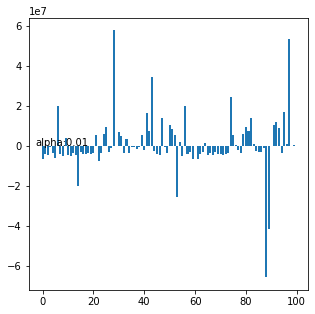

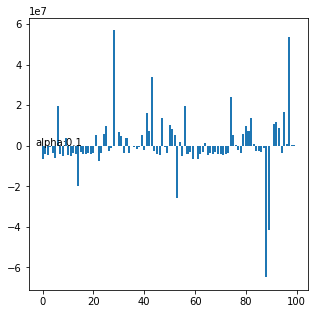

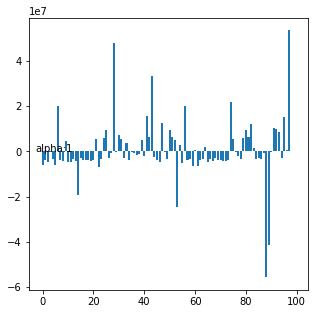

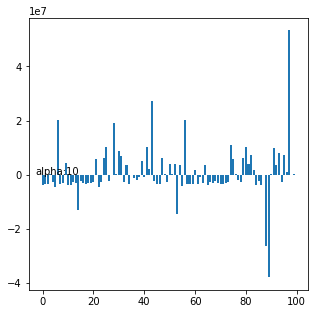

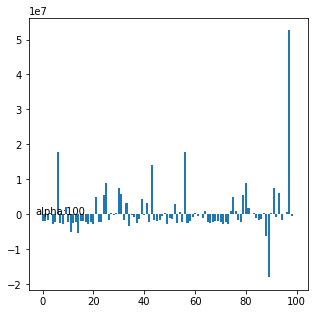

In [53]:
from sklearn.linear_model import Ridge
ridge = None
alpha_list = [0.01, 0.1, 1, 10, 100]
best_score = -1
ridge_best_params = {'alpha':0}

result = {
    'alpha': [], 'train_score': [], 'test_score':[]
}

for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_train, y_train)
  plt.figure(figsize=(5,5))
  plt.bar(range(ridge.coef_.shape[0]), ridge.coef_)
  plt.text(-3, 3, 'alpha:{}'.format(alpha))
  result['alpha'].append(alpha)
  result['train_score'].append(ridge.score(X_train, y_train))
  result['test_score'].append(ridge.score(X_test, y_test))
  score = ridge.score(X_train, y_train)

  if best_score < score:
    best_score = score
    ridge_best_params['alpha'] = alpha

    plt.show()
# 알파값(람다값)이 커지면 커질 수록 wiehgt의 스케일이 0에 가까워진다 (But, 0은 되지 않는다!)

In [54]:
result

{'alpha': [0.01, 0.1, 1, 10, 100],
 'test_score': [0.5169681193988465,
  0.5169890720246206,
  0.5168974828785959,
  0.5175222311598265,
  0.5190505678885801],
 'train_score': [0.416127493142075,
  0.4161272615985765,
  0.41608980570466125,
  0.4156211963427152,
  0.4133804961804661]}

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.877632658552423e+19, tolerance: 6436953035762579.0
  max_iter, tol, rng, random, positive)


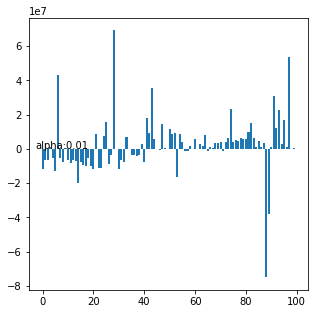

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8657807805144666e+19, tolerance: 6436953035762579.0
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2444786395764236e+19, tolerance: 6436953035762579.0
  max_iter, tol, rng, random, positive)


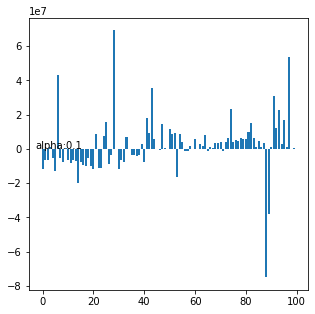

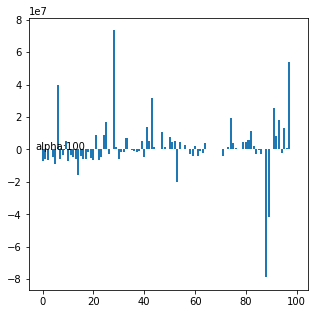

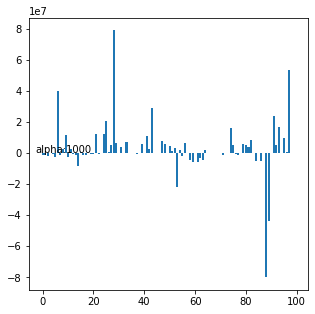

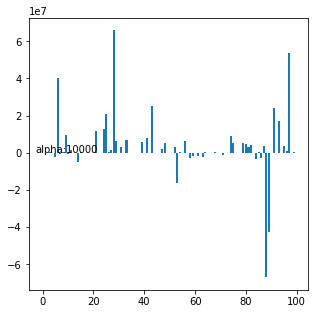

In [55]:
from sklearn.linear_model import Lasso
lasso = None
alpha_list = [0.01, 0.1, 100, 1000, 10000]
best_score = -1
lasso_best_params = {'alpha':0}

result = {
    'alpha': [], 'train_score': [], 'test_score':[]
}

for alpha in alpha_list:
  lasso = Lasso(alpha = alpha)
  lasso.fit(X_train, y_train)
  plt.figure(figsize=(5,5))
  plt.bar(range(lasso.coef_.shape[0]), lasso.coef_)
  plt.text(-3, 3, 'alpha:{}'.format(alpha))
  result['alpha'].append(alpha)
  result['train_score'].append(lasso.score(X_train, y_train))
  result['test_score'].append(lasso.score(X_test, y_test))
  score = lasso.score(X_train, y_train)

  if best_score < score:
    best_score = score
    lasso_best_params['alpha'] = alpha

    plt.show()

In [56]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha' : [0.1, 1, 10, 100, 1000, 10000],
    'l1_ratio' : np.arange(0.1, 1, 0.1)
}

grid_elastic = GridSearchCV(ElasticNet(), param_grid = param_grid, cv = 10, n_jobs = -1, scoring ='neg_mean_squared_error')

In [ ]:
grid_elastic.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 10, 100, 1000, 10000],
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
grid_elastic.best_params_

{'alpha': 0.1, 'l1_ratio': 0.9}

In [ ]:
model = grid_elastic.best_estimator_
model

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
model.score(X_train, y_train)

0.4136852068609532

In [ ]:
model.score(X_test, y_test)

0.518899788979302

## Tree Decision

In [72]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(500, max_depth = 5, random_state = 10, n_jobs = -1)
forest_reg.fit(X_train, y_train)
forest_reg.score(X_train, y_train)

0.8646339141045765

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [500, 1000, 2000],
    'max_depth' : [3, 4, 5]
}
grid_forest = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv = 10, n_jobs = -1, verbose = 1)
grid_forest

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [74]:
grid_forest.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 10.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [75]:
grid_forest.best_params_

{'max_depth': 5, 'n_estimators': 1000}

In [76]:
model_forest = grid_forest.best_estimator_
model_forest

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [77]:
print('train score : {:.3f}'.format(grid_forest.score(X_train, y_train)))
print('test socre : {:.3f}'.format(grid_forest.score(X_test, y_test)))

train score : 0.862
test socre : 0.792


In [78]:
grid_forest.cv_results_

{'mean_fit_time': array([ 4.36705487,  8.5456183 , 17.04923029,  5.59706438, 11.13592355,
        22.33053031,  7.12332656, 14.2759748 , 28.62425816]),
 'mean_score_time': array([0.07182283, 0.11938672, 0.23513494, 0.06262887, 0.12977695,
        0.2475966 , 0.06540303, 0.13044698, 0.24742165]),
 'mean_test_score': array([0.58880995, 0.58621177, 0.58698512, 0.64127279, 0.64609159,
        0.64432419, 0.70583363, 0.70970254, 0.70505653]),
 'param_max_depth': masked_array(data=[3, 3, 3, 4, 4, 4, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[500, 1000, 2000, 500, 1000, 2000, 500, 1000, 2000],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3, 'n_estimators': 500},
  {'max_depth': 3, 'n_estimators':

In [83]:
forest_reg = RandomForestRegressor(1000, max_depth = 5, random_state = 10, n_jobs = -1)
forest_reg.fit(X_train, y_train)
forest_reg.score(X_train, y_train)

0.8634298032619472

In [84]:
forest_reg.score(X_test, y_test)

0.794114277284219

In [85]:
model_forest.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.02703309e-04,
       1.47184945e-03, 0.00000000e+00, 4.32126096e-03, 0.00000000e+00,
       0.00000000e+00, 6.59025458e-04, 0.00000000e+00, 1.75961710e-03,
       1.26117077e-05, 0.00000000e+00, 3.02630627e-03, 3.29074903e-04,
       0.00000000e+00, 0.00000000e+00, 2.12960263e-04, 1.43640233e-05,
       0.00000000e+00, 4.99019173e-03, 0.00000000e+00, 0.00000000e+00,
       3.86235239e-03, 1.28196024e-02, 7.91295819e-06, 5.66861191e-04,
       1.50701297e-05, 1.50816340e-03, 2.83539221e-03, 4.54467144e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.25302053e-03, 5.67764980e-03, 5.09654802e-03, 1.16509152e-02,
       0.00000000e+00, 6.04062817e-04, 1.59555322e-04, 2.08309514e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.96719556e-04, 9.43015332e-04, 2.06375387e-05, 0.00000000e+00,
       1.85400333e-03, 4.49435535e-03, 9.70947066e-08, 0.00000000e+00,
      

IndexError: ignored

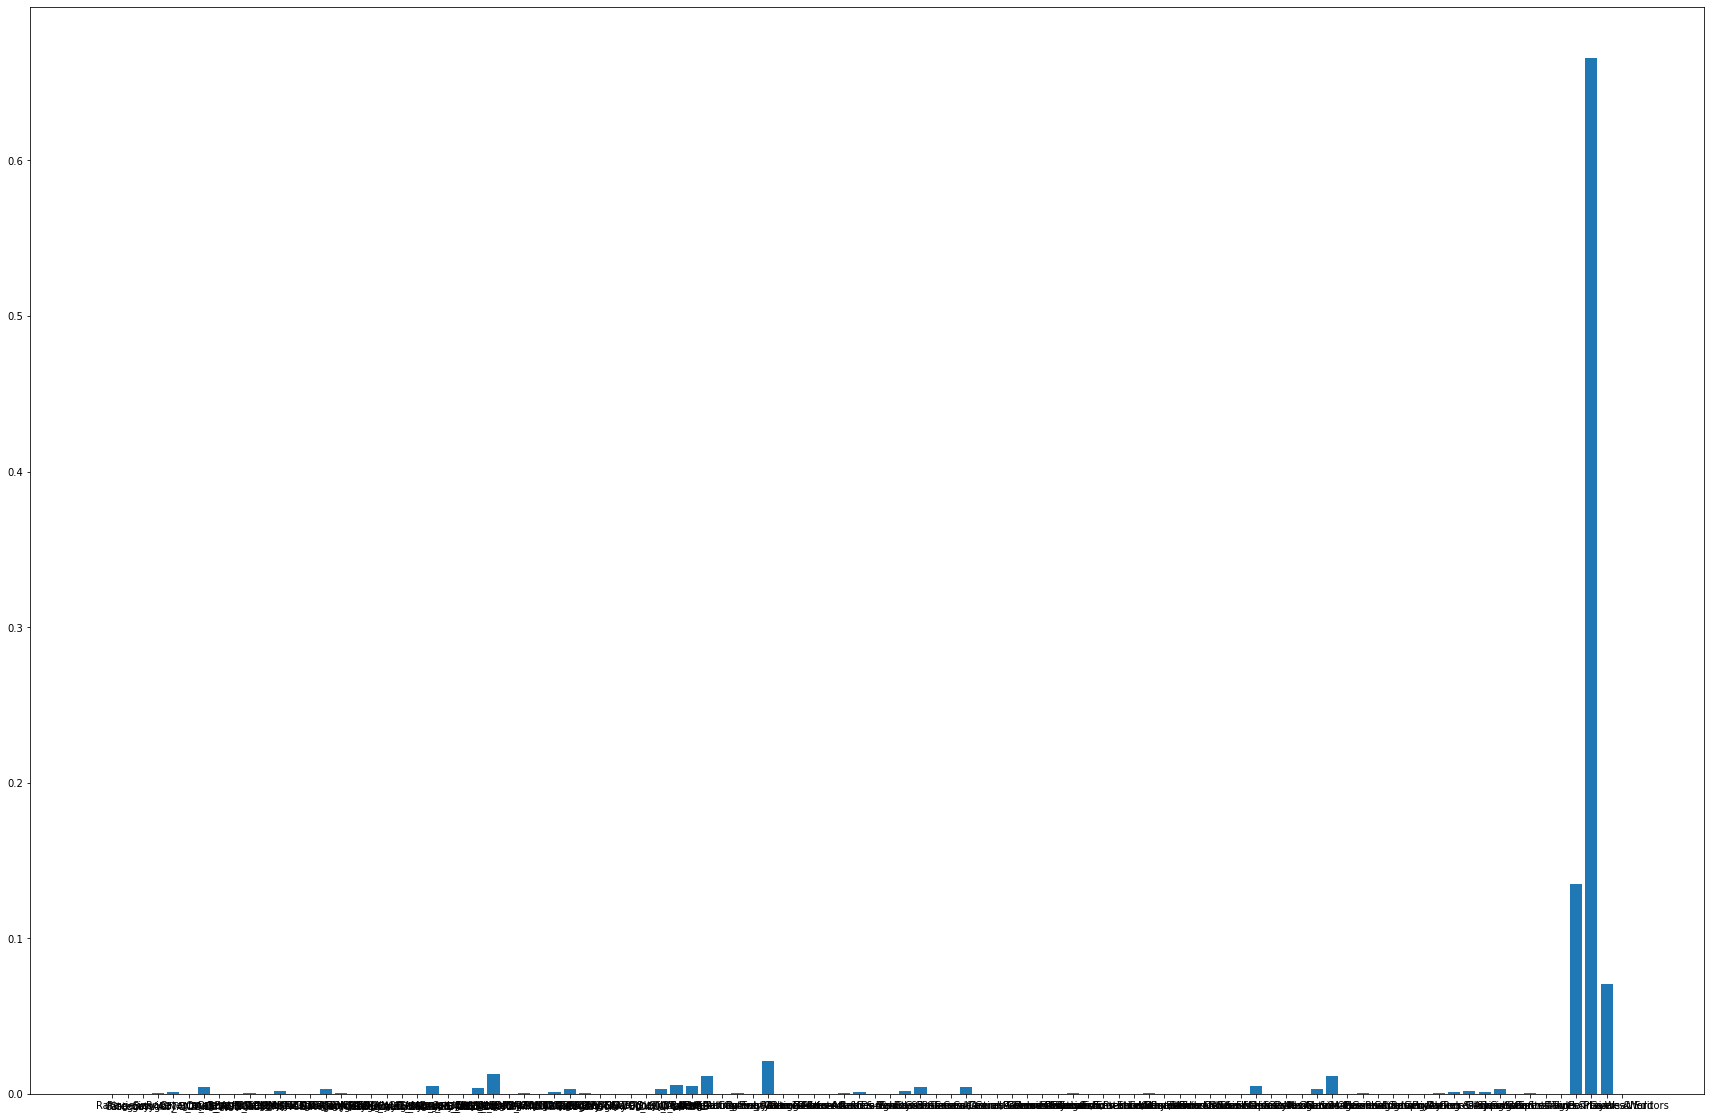

In [80]:
# 중요도 그래프
plt.figure(figsize = (30, 20))
plt.bar(np.arange(X_train.shape[1]), model_forest.feature_importances_)
plt.xticks(np.arange(X_train.shape[1]), X_index)
plt.xlim(-1, X_train.data.shape[1])
plt.show()

In [87]:
[ X_index[i] for i in np.argsort(model_forest.feature_importances_)[::-1]][:15]

['Genres-Video Players & Editors',
 'Genres-Trivia',
 'Genres-Weather',
 'Content Rating-Teen',
 'Category-NEWS_AND_MAGAZINES',
 'Content Rating-Adults only 18+',
 'Genres-Other',
 'Type-Free',
 'Type-Paid',
 'Category-LIBRARIES_AND_DEMO',
 'Genres-Lifestyle',
 'Genres-Casual',
 'Genres-Business',
 'Category-BEAUTY',
 'Category-MEDICAL']

In [ ]:
feature_important = []
for i in range(len(model_forest.feature_importances_)):
  feature_important.append([X_index[i], model_forest.feature_importances_[i]])

In [ ]:
feature_important

In [ ]:
feature_important.sort

##  XGBoost

In [82]:
!pip install xgboost

In [57]:
import xgboost as xgb
model = xgb.XGBRe

AttributeError: ignored

In [87]:
xgb_model = xgb.XGBRegressor(n_estimators=500, 
                              learning_rate = 0.1, 
                              max_depth = 3).fit(X_train, y_train)

[08:30:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [88]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [89]:
print('train score : {}'.format(xgb_model.score(X_train, y_train)))
print('test score : {}'.format(xgb_model.score(X_test, y_test)))

train score : 0.9850965945799186
test score : 0.8998227614473042


In [90]:
def get_xgb_imp(xgb, feat_names):
    from numpy import array
    imp_vals = xgb.booster().get_fscore()
    imp_dict = {feat_names[i]:float(imp_vals.get('f'+str(i),0.)) for i in range(len(feat_names))}
    total = array(imp_dict.values()).sum()
    return {k:v/total for k,v in imp_dict.items()}

In [91]:
df2 = pd.DataFrame()

In [92]:
len(X_index)

100

In [93]:
X_train.shape

(8672, 100)

In [ ]:
feature_important = [ X_index[i] for i in np.argsort(xgb_model.feature_importances_)[::-1]]
feature_important[:10]

['Content Rating-Teen',
 'Category-SHOPPING',
 'Content Rating-Adults only 18+',
 'Type-Free',
 'Genres-Weather',
 'Genres-Video Players & Editors',
 'Category-NEWS_AND_MAGAZINES',
 'Genres-Trivia',
 'Category-LIBRARIES_AND_DEMO',
 'Category-EVENTS']

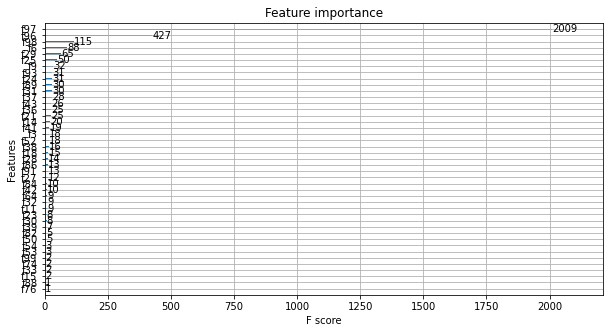

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
fig, ax = plt.subplots(figsize = (10,5))
plot_importance(xgb_model, ax = ax)
plt.show()

In [ ]:
df['Genres'].describe(include='all')

count     10840
unique       55
top       Tools
freq        842
Name: Genres, dtype: object

In [ ]:
len(np.unique(df['Genres']))

55

In [ ]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [ ]:
# import seaborn as sns
# sns.countplot(x=df['Genres'], data = df)

df['Genres'].value_counts()

Tools                          842
Entertainment                  623
Education                      549
Medical                        463
Business                       460
Productivity                   424
Sports                         398
Personalization                392
Communication                  387
Lifestyle                      381
Finance                        366
Action                         365
Health & Fitness               341
Photography                    335
Social                         295
Other                          285
News & Magazines               283
Shopping                       260
Travel & Local                 257
Dating                         234
Books & Reference              231
Arcade                         220
Simulation                     200
Casual                         193
Video Players & Editors        173
Puzzle                         140
Maps & Navigation              137
Food & Drink                   127
Role Playing        

## SVM 모델

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

try: 
  import mglearn
except:
  !pip install mglearn
  import mglearn

     |████████████████████████████████| 542kB 4.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=2748031582b93701e66821e7e65a79cc883e546c8fd289d57ed13a176c321e67
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [96]:
np.argsort(xgb_model.feature_importances_)[::-1]

array([43, 30, 39, 37, 98, 97, 25, 96, 21, 14, 23,  3,  9, 29, 24, 41, 53,
        6, 31, 18, 27, 52, 36, 38, 15, 76, 93, 91, 11, 89, 33, 74, 88, 42,
       28, 32, 86, 84, 64, 50, 82, 54, 99,  7, 34,  1, 16,  2, 17, 12, 35,
       19,  5,  4, 20, 22, 10,  8, 26, 13, 49, 40, 80, 71, 72, 73, 75, 77,
       78, 79, 81, 69, 83, 85, 87, 90, 92, 94, 95, 70, 68, 44, 57, 45, 46,
       47, 48, 51, 55, 56, 58, 67, 59, 60, 61, 62, 63, 65, 66,  0])

In [178]:
top15 = np.argsort(xgb_model.feature_importances_)[::-1][:5]
top15

array([43, 30, 39, 37, 98])

In [58]:
top15 = [43, 30, 39, 37, 98, 97, 25, 96, 21, 14, 23,  3,  9, 29, 24, 41, 53,
        6, 31, 18, 27, 52, 36, 38, 15, 76, 93, 91, 11, 89, 33, 74, 88, 42,
       28, 32, 86, 84, 64, 50, 82, 54, 99,  7, 34,  1, 16,  2, 17, 12, 35,
       19,  5,  4, 20, 22, 10,  8, 26, 13, 49, 40, 80, 71, 72, 73, 75, 77,
       78, 79, 81, 69, 83, 85, 87, 90, 92, 94, 95, 70, 68, 44, 57, 45, 46,
       47, 48, 51, 55, 56, 58, 67, 59, 60, 61, 62, 63, 65, 66,  0][:15]

In [59]:
X_train

<8672x100 sparse matrix of type '<class 'numpy.float64'>'
	with 69376 stored elements in Compressed Sparse Row format>

In [60]:
import scipy
new = scipy.sparse.lil_matrix(X_train)
new = new[:,top15]

In [181]:
from sklearn.svm import SVR

svr = SVR(kernel ='linear')
svr.fit(new, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [182]:
X_test_new = scipy.sparse.lil_matrix(X_test)
X_test_new = X_test_new[:,top15]

In [183]:
train_score = svr.score(new, y_train)
test_score = svr.score(X_test_new, y_test)

print("train score:{} \ntest score:{}".format(train_score, test_score))

train score:-0.031642647024418435 
test score:-0.03728033962179422


In [184]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf', C = 10, gamma = 10) 
#rbf, C = 1이 원래 디폴트
svr.fit(new, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [185]:
train_score = svr.score(new, y_train)
test_score = svr.score(X_test_new, y_test)

print("train score:{} \ntest score:{}".format(train_score, test_score))

train score:-0.03163875686573503 
test score:-0.037274674221117854


In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'poly', C = 10, gamma = 10) 
#rbf, C = 1이 원래 디폴트
svr.fit(X_train, y_train)

In [ ]:
train_score = svr.score(X_train, y_train)
test_score = svr.score(X_test, y_test)

print("train score:{} \ntest score:{}".format(train_score, test_score))

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'sigmoid', C = 10, gamma = 10) 
#rbf, C = 1이 원래 디폴트
svr.fit(X_train, y_train)

train_score = svr.score(X_train, y_train)
test_score = svr.score(X_test, y_test)

print("train score:{} \ntest score:{}".format(train_score, test_score))

train score:-0.03161227487882634 
test score:-0.037241565162898116


In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'precomputed', C = 10, gamma = 10) 
#rbf, C = 1이 원래 디폴트
svr.fit(X_train, y_train)

train_score = svr.score(X_train, y_train)
test_score = svr.score(X_test, y_test)

print("train score:{} \ntest score:{}".format(train_score, test_score))

TypeError: ignored

In [ ]:
C_list = [0.01, 0.1, 1, 10]
gamma_list = [0.01, 0.1, 1, 10]
result = {
    'train_score' : [],
    'test_score' : [],
    'C': [],
    'gamma': []}

for C in C_list:
  for gamma in gamma_list:
    svr2 = SVR(kernel = 'rbf', C = C, gamma = gamma)
    svr2.fit(X_train, y_train)
    result['C'].append(C)
    result['gamma'].append(gamma)
    result['train_score'].append(svr2.score(X_train, y_train))
    result['test_score'].append(svr2.score(X_test, y_test))

In [ ]:
print(result['train_score'], sep = "")
print(result['test_score'], sep = "")
print(result['C'], sep = "")
print(result['gamma'], sep = "", end = "")

[-0.03164745656924306, -0.031647453294783245, -0.03164745815799841, -0.031647458412669804, -0.03164743489614752, -0.031647402448027995, -0.03164745267252167, -0.03164745671667868, -0.031647218098157515, -0.03164689575670221, -0.03164739647674941, -0.031647439064004024, -0.03164504899307663, -0.031641825443415206, -0.03164683441772986, -0.03164726198050216]
[-0.03728494659689385, -0.03728494290995954, -0.03728494830884821, -0.03728494856708764, -0.03728492317168808, -0.03728488667880425, -0.037284942505302565, -0.037284946846127154, -0.03728468887018255, -0.03728432647926572, -0.037284882912239636, -0.03728492882346446, -0.037282344566170966, -0.0372787204805729, -0.03728428697771413, -0.03728474795594261]
[0.01, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1, 1, 1, 1, 1, 10, 10, 10, 10]
[0.01, 0.1, 1, 10, 0.01, 0.1, 1, 10, 0.01, 0.1, 1, 10, 0.01, 0.1, 1, 10]

In [62]:
import scikits.learn.svm.sparse.SVR

ModuleNotFoundError: ignored

## PCA

In [68]:
from sklearn.decomposition import TruncatedSVD
# TruncatedSVD?

In [69]:
from sklearn.svm import SVR
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 50)
svd_data = svd.fit_transform(X_train)
svd_test = svd.fit_transform(X_test)

In [70]:
C_list = [0.01, 0.1, 1, 10]
gamma_list = [0.01, 0.1, 1, 10]
result = {
    'train_score' : [],
    'test_score' : [],
    'C': [],
    'gamma': []}

for C in C_list:
  for gamma in gamma_list:
    svr_2 = SVR(kernel = 'rbf', C = C, gamma = gamma)
    svr_2.fit(svd_data, y_train)
    result['C'].append(C)
    result['gamma'].append(gamma)
    result['train_score'].append(svr_2.score(svd_data, y_train))
    result['test_score'].append(svr_2.score(svd_test, y_test))

In [71]:
print(result['train_score'], sep = "")
print(result['test_score'], sep = "")
print(result['C'], sep = "")
print(result['gamma'], sep = "", end = "")

[-0.031647456572349464, -0.031647453296558936, -0.03164745817390613, -0.031647458418531116, -0.031647434921799666, -0.03164740235771313, -0.0316474525672783, -0.03164745672335734, -0.03164721837640738, -0.03164689427660616, -0.031647395041879856, -0.031647439065081384, -0.03164505128659534, -0.03164181366274921, -0.031646819297372675, -0.031647261878613886]
[-0.03728494663489612, -0.037284942488771344, -0.037284948854617195, -0.03728494874209476, -0.0372849238419648, -0.03728488269142671, -0.03728494772532165, -0.037284948548961916, -0.03728469543962043, -0.03728428609814305, -0.037284934753357035, -0.03728494580646258, -0.03728240944787986, -0.037278321132937275, -0.03728480437941739, -0.03728491766348485]
[0.01, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1, 1, 1, 1, 1, 10, 10, 10, 10]
[0.01, 0.1, 1, 10, 0.01, 0.1, 1, 10, 0.01, 0.1, 1, 10, 0.01, 0.1, 1, 10]